In [1]:
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 데이터 불러오기
df = pd.read_csv('bitcoin_data.csv')
df.dropna(inplace=True)

# 이동평균 계산
df['RSI'] = ta.RSI(df['close'], timeperiod=14)
df.dropna(inplace=True)

# 입력 데이터와 타겟 값 생성
X = df[['RSI']].values
Y = df['close'].values

# 데이터 스케일링
scaler = MinMaxScaler()

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.2, shuffle=False,
                                                    random_state=0)

# X 학습 테스트
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Y 학습 테스트
Y_train = scaler.fit_transform(Y_train.reshape(-1, 1)).flatten()
Y_test = scaler.fit_transform(Y_test.reshape(-1, 1)).flatten()

# 전체 비교용 X Y
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y.reshape(-1, 1)).flatten()

# 모델 구축
model = LinearRegression()

# 모델 학습
model.fit(X_train, Y_train)

# 테스트 데이터 예측
Y_pred = model.predict(X_test)
Y_pred_all = model.predict(X_scaled)

# 예측 결과 역스케일링
Y_pred_scaled = scaler.inverse_transform(Y_pred.reshape(-1, 1)).flatten()
Y_pred_scaled_all = scaler.inverse_transform(Y_pred_all.reshape(-1, 1)).flatten()
Y_test_scaled = scaler.inverse_transform(Y_scaled.reshape(-1, 1)).flatten()

print(Y_pred_scaled)

[21922880.5004655  21847210.05565725 21797722.74659948 22383950.67218643
 21639750.75051289 22266965.38946043 22573763.73979529 22219665.70894929
 22040289.42103654 22096467.47136861 22177455.77567289 21844284.98322444
 22861677.46219131 21705991.03114939 21514640.28183715 21354572.90330128
 20877593.92923955 20132044.92850003 20155012.81157103 20027725.87597194
 19860308.75553531 19876334.53282368 20298010.48177785 20837717.98053131
 20467257.28785411 20468984.89275119 20046658.19044252 20940861.17873352
 20717701.70887878 20859727.97518491 21317249.23521016 20940946.55960225
 21140545.12287952 21197769.22564298 21119625.28057643 20887607.9737347
 21008818.92700317 21227193.19785488 22408395.67137766 22583499.39561331
 21820118.73954132 22069821.80800655 21877082.34059295 21911722.49457989
 21943515.37084243 22764507.30614444 22701670.90721985 22324640.74548322
 22179840.65143107 21898627.77584336 21668363.29534072 20872976.34036293
 19818977.96333886 19744193.35431117 19978925.469807

In [3]:
r2_train = r2_score(Y_train, model.predict(X_train))
r2_test = r2_score(Y_test, model.predict(X_test))

print(f"[r2_score] train : {r2_train} / test : {r2_test}")

# mse
mse = mean_squared_error(Y_test, Y_pred)
# rmse
rmse = np.sqrt(mse)

print(f'[MSE] : {mse:.3f}\n[RMSE] : {rmse:.3f}')

[r2_score] train : 0.0038469866672885544 / test : -0.17432067549239338
[MSE] : 0.057
[RMSE] : 0.238


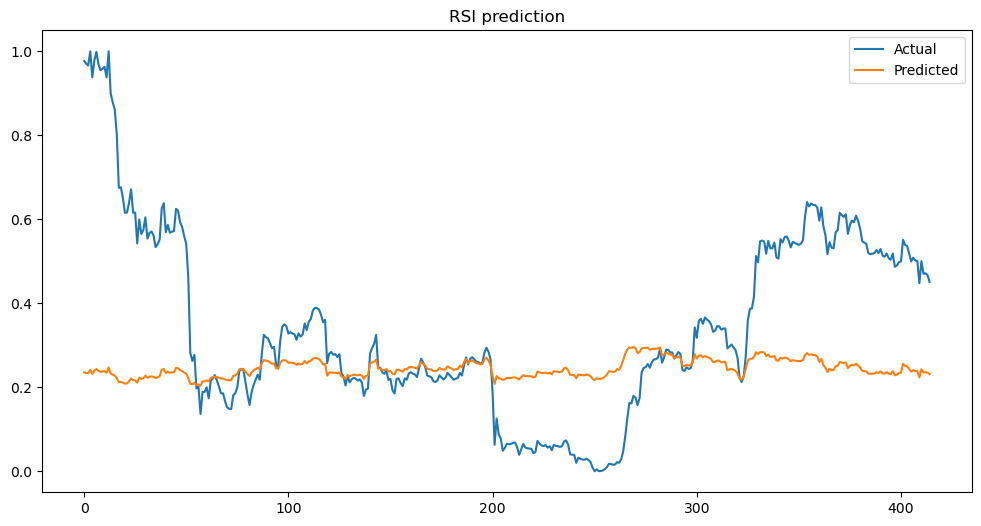

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(Y_test, label='Actual')
plt.plot(Y_pred, label='Predicted')
plt.title("RSI prediction")
#plt.axvline(149, 0, 1, color='lightgray', linestyle='--')
plt.legend()
plt.show()